In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [3]:
import pandas as pd
from backtester import Backtester
from strategies.simple_moving_average_long import TrendFollowingStrategy,TrendFollowingStrategyVolPossitioning
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategyVolPossitioning
param_grid = {
    "window": range(2,401,2),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)
xls = xls[xls.index >= "2021-03-11"]

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [8]:
#get columns names in the dataframe
assets = xls.columns.tolist()
assets=['Aave', 'Bitcoin','Solana','Ethereum']

In [9]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],long_only=False,**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)


results_df = pd.DataFrame(results)
results_df.sort_values(by="sharpe", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(50)


,asset,window,total_net_return,annualized_return,sharpe,max_drawdown,avg_trade_return,median_trade_return,avg_trade_return_long,median_trade_return_long,avg_trade_return_short,median_trade_return_short,skewness,num_trades,total_fees_paid,fees_as_pct_of_gross
0,Solana,32,3.1743,1.0204,1.58,-0.3174,0.05757,-0.01963,0.12127,-0.01189,-0.00613,-0.02377,0.195,34,0.0198,1.37
1,Solana,34,3.0331,0.9865,1.55,-0.2872,0.06178,-0.01187,0.13239,-0.00935,-0.00883,-0.01219,0.156,30,0.0176,1.25
2,Solana,30,2.9845,0.9747,1.52,-0.3507,0.05285,-0.01638,0.11228,-0.0209,-0.00657,-0.01435,0.243,36,0.0208,1.48
3,Solana,36,2.9278,0.9608,1.52,-0.2789,0.05933,-0.01002,0.12645,-0.00988,-0.00779,-0.01016,0.177,30,0.0170,1.23
4,Solana,10,3.1162,1.0065,1.43,-0.2702,0.02695,-0.01399,0.03809,-0.01794,0.01580,-0.00755,0.283,66,0.0430,2.95
5,Solana,38,2.5520,0.8661,1.42,-0.3443,0.05594,-0.01231,0.12027,-0.01815,-0.00839,-0.01059,0.194,30,0.0168,1.31
6,Solana,16,2.8343,0.9377,1.42,-0.3269,0.03656,-0.01151,0.05808,-0.00032,0.01503,-0.01585,0.204,50,0.0307,2.24
7,Solana,14,2.8358,0.9381,1.41,-0.2380,0.02877,-0.01318,0.04032,-0.015,0.01723,-0.01254,0.234,60,0.0368,2.67
8,Solana,28,2.4857,0.8489,1.36,-0.4362,0.04455,-0.01607,0.10202,-0.00919,-0.01292,-0.0191,0.248,40,0.0227,1.79
9,Solana,22,2.3051,0.8011,1.29,-0.3579,0.04337,-0.01106,0.07712,-0.01137,0.00961,-0.01106,0.155,48,0.0282,2.31


<Axes: title={'center': 'Sharpe Ratio for Bitcoin by Window Size'}, xlabel='window'>

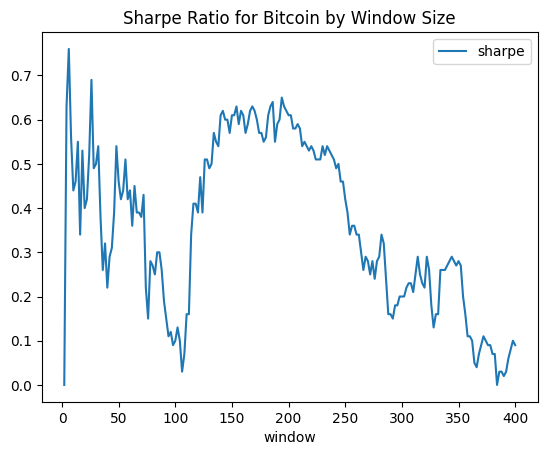

In [13]:
a=results_df[results_df["asset"] == 'Ethereum'].sort_values(by="window", ascending=False)
a[["window","sharpe"]].plot(x="window", y="sharpe", kind="line", title=f"Sharpe Ratio for Bitcoin by Window Size")

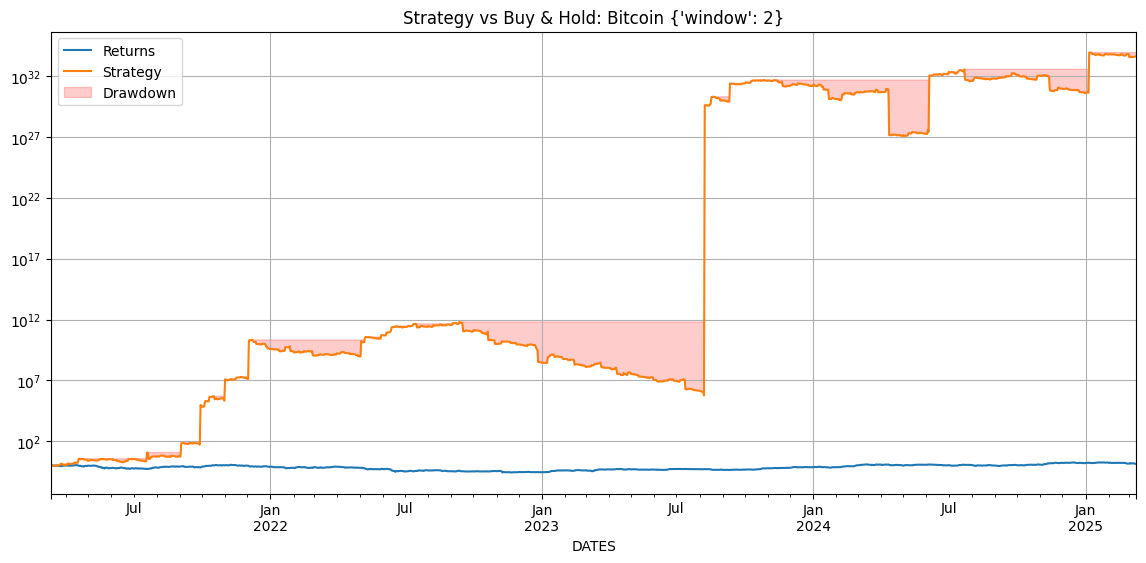

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-13 2021-03-13      Long   -0.000184       -0.018360       1   
1 2021-03-14 2021-03-16     Short    0.023456        2.373333       3   
2 2021-03-17 2021-03-17      Long   -0.014391       -1.428835       1   
3 2021-03-18 2021-03-18     Short   -0.007780       -0.775011       1   
4 2021-03-19 2021-03-20      Long   -0.018136       -1.797216       2   
5 2021-03-21 2021-03-25     Short    0.379671       46.180426       5   
6 2021-03-26 2021-03-27      Long   -0.032974       -3.243662       2   
7 2021-03-28 2021-03-28     Short   -0.207973      -18.777141       1   
8 2021-03-29 2021-03-31      Long   -0.005841       -0.582363       3   
9 2021-04-01 2021-04-04     Short    0.266287       30.510989       4   

   total_fees  
0    0.000184  
1    0.000520  
2    0.000839  
3    0.001140  
4    0.001639  
5    0.007694  
6    0.004797  
7    0.004602  
8    0.001209  
9    0.019921  


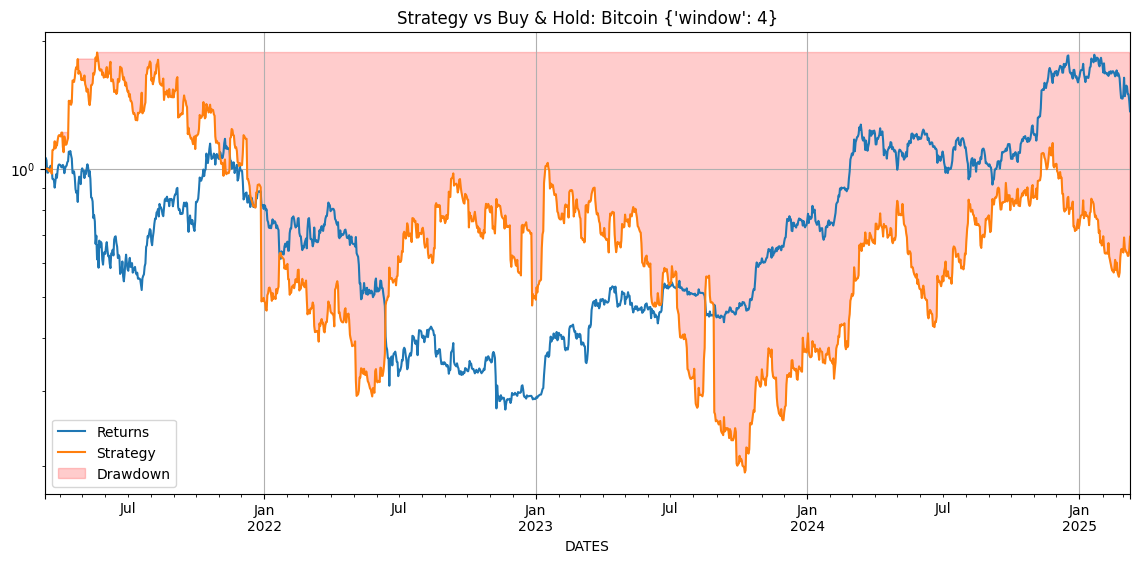

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-15 2021-03-16     Short    0.000032        0.003204       2   
1 2021-03-17 2021-03-20      Long   -0.000061       -0.006088       4   
2 2021-03-21 2021-03-25     Short    0.148254       15.980775       5   
3 2021-03-26 2021-04-01      Long    0.031754        3.226403       7   
4 2021-04-02 2021-04-04     Short    0.015838        1.596374       3   
5 2021-04-05 2021-04-05      Long   -0.078996       -7.595611       1   
6 2021-04-06 2021-04-08     Short    0.024344        2.464247       3   
7 2021-04-09 2021-04-15      Long    0.226932       25.474509       7   
8 2021-04-16 2021-04-25     Short    0.225533       25.298981      10   
9 2021-04-26 2021-04-28      Long   -0.071246       -6.876696       3   

   total_fees  
0    0.000188  
1    0.001018  
2    0.002358  
3    0.001043  
4    0.002864  
5    0.003420  
6    0.002629  
7    0.003127  
8    0.001539  
9    0.000477  


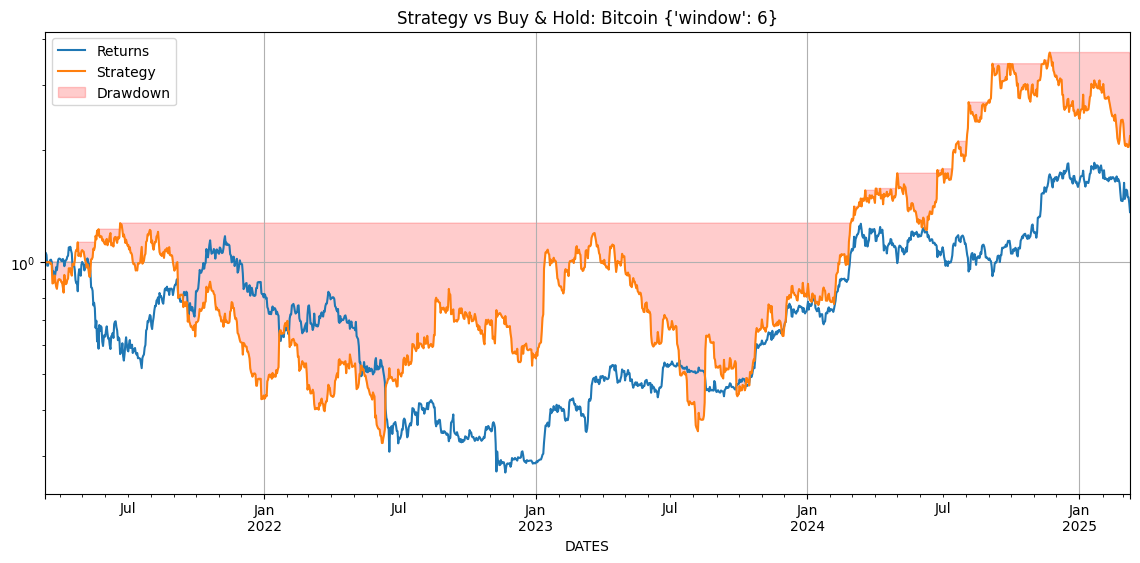

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-17 2021-03-18     Short    0.002308        0.231020       2   
1 2021-03-19 2021-03-21      Long   -0.018753       -1.857842       3   
2 2021-03-22 2021-03-26     Short   -0.107597      -10.201021       5   
3 2021-03-27 2021-04-02      Long    0.013485        1.357681       7   
4 2021-04-03 2021-04-04     Short   -0.013382       -1.329302       2   
5 2021-04-05 2021-04-05      Long   -0.030386       -2.992900       1   
6 2021-04-06 2021-04-08     Short    0.033152        3.370718       3   
7 2021-04-09 2021-04-16      Long    0.057124        5.878689       8   
8 2021-04-17 2021-04-25     Short    0.187728       20.650533       9   
9 2021-04-26 2021-05-03      Long   -0.057975       -5.632668       8   

   total_fees  
0    0.000236  
1    0.001024  
2    0.001353  
3    0.000887  
4    0.001351  
5    0.002207  
6    0.003338  
7    0.001307  
8    0.001192  
9    0.000683  


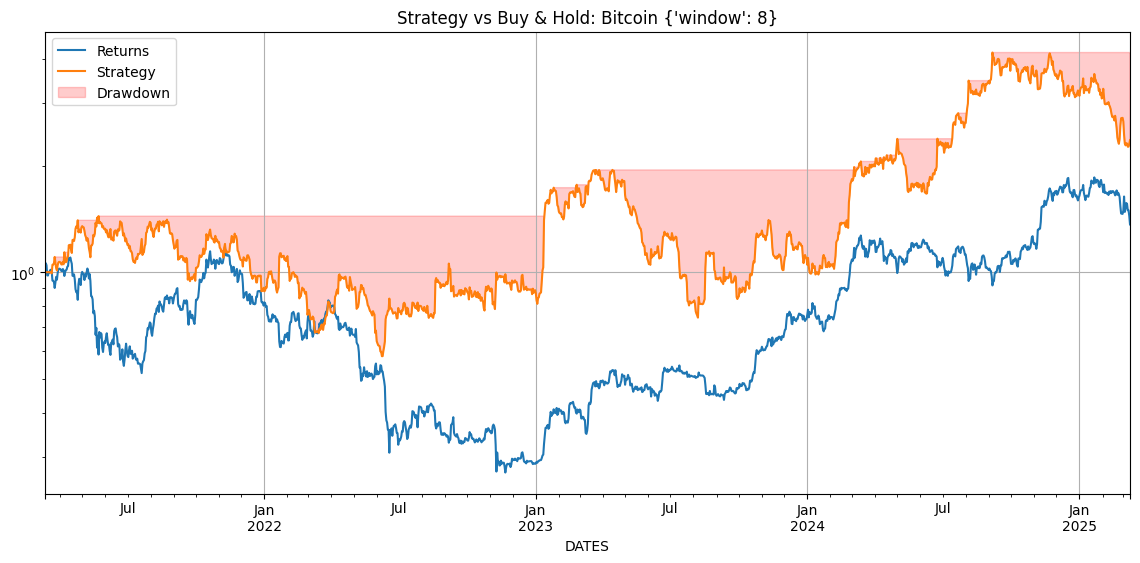

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-19 2021-03-20      Long    0.001267        0.126770       2   
1 2021-03-21 2021-03-26     Short    0.055885        5.747596       6   
2 2021-03-27 2021-04-05      Long    0.009975        1.002459      10   
3 2021-04-06 2021-04-08     Short    0.015118        1.523317       3   
4 2021-04-09 2021-04-16      Long    0.065599        6.779806       8   
5 2021-04-17 2021-04-25     Short    0.189962       20.920359       9   
6 2021-04-26 2021-05-03      Long   -0.046315       -4.525907       8   
7 2021-05-04 2021-05-04     Short   -0.021863       -2.162617       1   
8 2021-05-05 2021-05-05      Long   -0.029067       -2.864823       1   
9 2021-05-06 2021-05-06     Short   -0.012935       -1.285159       1   

   total_fees  
0    0.000277  
1    0.000941  
2    0.001035  
3    0.001790  
4    0.001568  
5    0.001277  
6    0.000564  
7    0.000532  
8    0.000596  
9    0.000591  


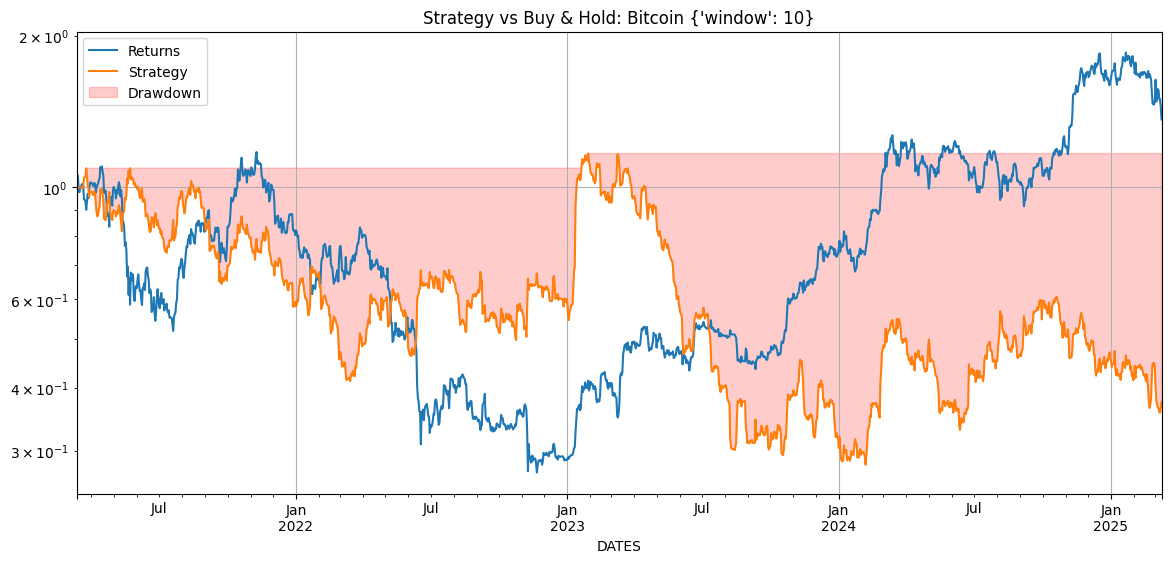

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-21 2021-03-26     Short    0.045898        4.696720       6   
1 2021-03-27 2021-03-27      Long   -0.032807       -3.227441       1   
2 2021-03-28 2021-03-28     Short   -0.017516       -1.736350       1   
3 2021-03-29 2021-04-06      Long   -0.027067       -2.670392       9   
4 2021-04-07 2021-04-08     Short   -0.083632       -8.023006       2   
5 2021-04-09 2021-04-17      Long    0.064300        6.641243       9   
6 2021-04-18 2021-04-26     Short   -0.058309       -5.664187       9   
7 2021-04-27 2021-05-09      Long    0.013801        1.389661      13   
8 2021-05-10 2021-05-10     Short   -0.038653       -3.791517       1   
9 2021-05-11 2021-05-11      Long   -0.027106       -2.674202       1   

   total_fees  
0    0.000573  
1    0.000731  
2    0.000709  
3    0.000955  
4    0.001162  
5    0.001508  
6    0.001054  
7    0.000606  
8    0.000697  
9    0.000724  


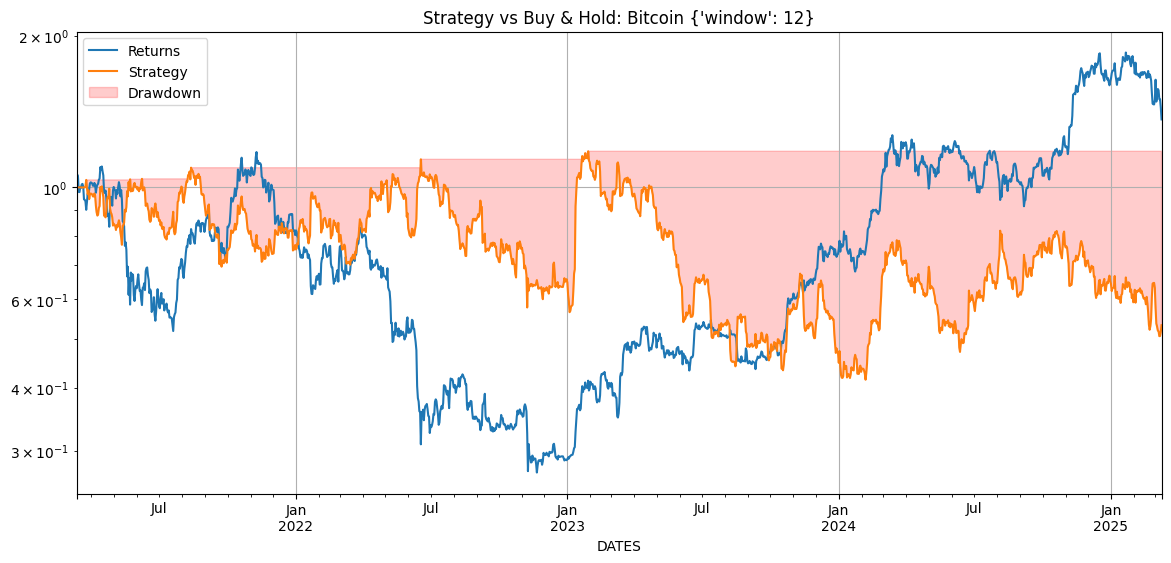

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-23 2021-03-28     Short   -0.013382       -1.329292       6   
1 2021-03-29 2021-04-06      Long   -0.024847       -2.454128       9   
2 2021-04-07 2021-04-08     Short   -0.075910       -7.309995       2   
3 2021-04-09 2021-04-17      Long    0.070489        7.303259       9   
4 2021-04-18 2021-04-26     Short   -0.050184       -4.894553       9   
5 2021-04-27 2021-04-28      Long   -0.027781       -2.739828       2   
6 2021-04-29 2021-04-29     Short   -0.015089       -1.497558       1   
7 2021-04-30 2021-05-09      Long   -0.029333       -2.890736      10   
8 2021-05-10 2021-05-10     Short   -0.039558       -3.878589       1   
9 2021-05-11 2021-05-11      Long   -0.022548       -2.229605       1   

   total_fees  
0    0.000477  
1    0.000900  
2    0.001003  
3    0.001404  
4    0.000999  
5    0.000441  
6    0.000434  
7    0.000563  
8    0.000643  
9    0.000618  


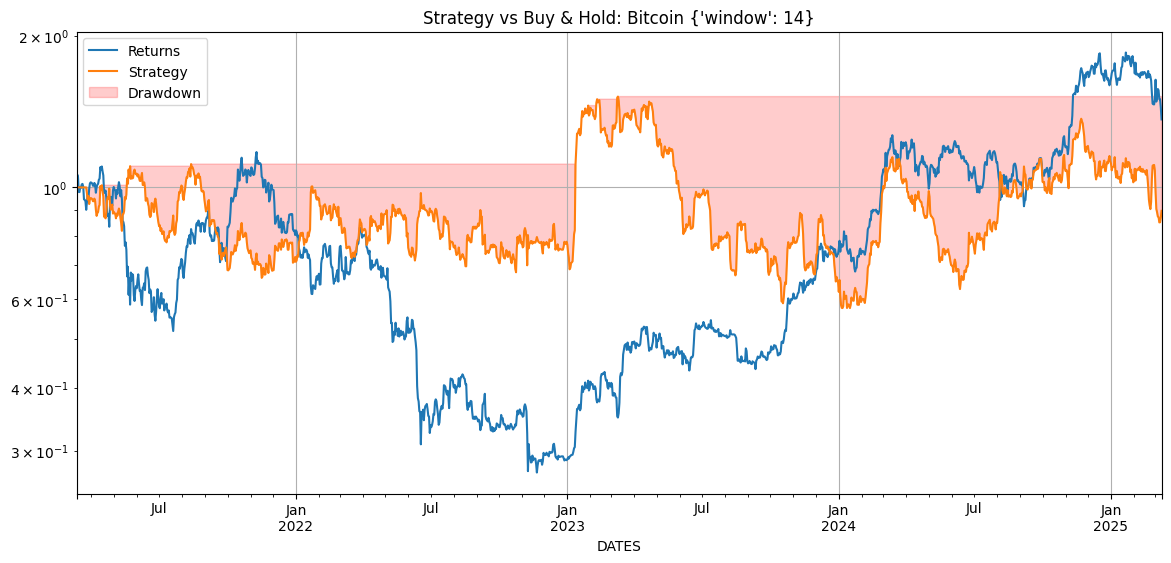

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-25 2021-03-28     Short   -0.039323       -3.856028       4   
1 2021-03-29 2021-04-06      Long   -0.023020       -2.275673       9   
2 2021-04-07 2021-04-07     Short   -0.040823       -4.000125       1   
3 2021-04-08 2021-04-17      Long    0.061968        6.392797      10   
4 2021-04-18 2021-04-29     Short   -0.037520       -3.682533      12   
5 2021-04-30 2021-05-09      Long   -0.029379       -2.895139      10   
6 2021-05-10 2021-05-10     Short   -0.031609       -3.111457       1   
7 2021-05-11 2021-05-11      Long   -0.023308       -2.303822       1   
8 2021-05-12 2021-06-01     Short    0.225591       25.306298      21   
9 2021-06-02 2021-06-04      Long   -0.019100       -1.891912       3   

   total_fees  
0    0.000377  
1    0.000823  
2    0.000868  
3    0.001272  
4    0.000947  
5    0.000519  
6    0.000585  
7    0.000640  
8    0.000898  
9    0.000283  


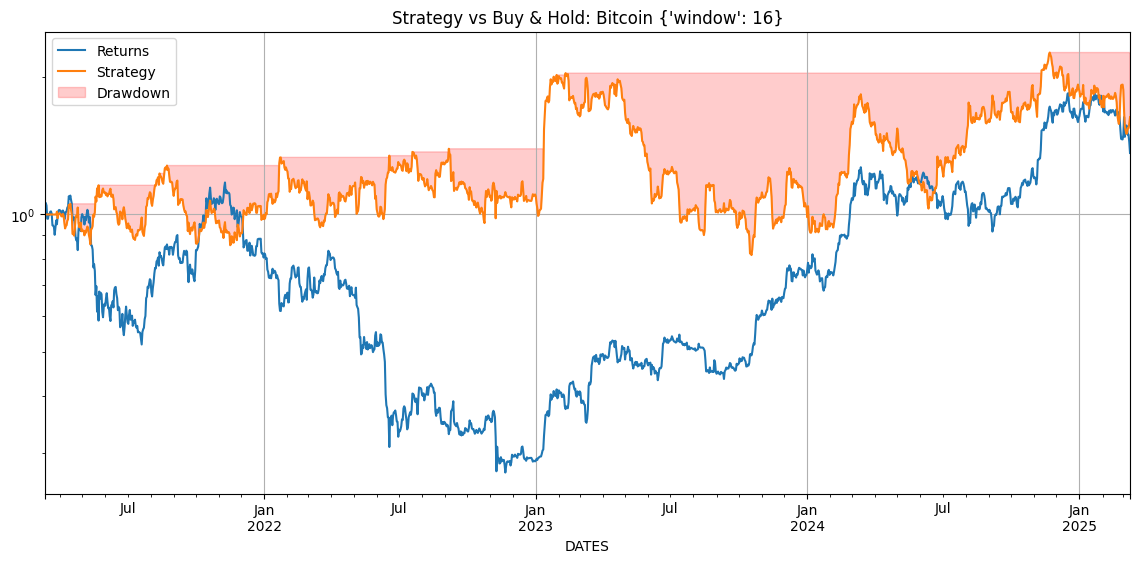

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-27 2021-03-28     Short    0.014012        1.411067       2   
1 2021-03-29 2021-04-06      Long   -0.020125       -1.992391       9   
2 2021-04-07 2021-04-07     Short   -0.035582       -3.495648       1   
3 2021-04-08 2021-04-17      Long    0.041301        4.216620      10   
4 2021-04-18 2021-04-29     Short   -0.040891       -4.006638      12   
5 2021-04-30 2021-05-09      Long   -0.031641       -3.114533      10   
6 2021-05-10 2021-05-10     Short   -0.030504       -3.004370       1   
7 2021-05-11 2021-05-11      Long   -0.018038       -1.787618       1   
8 2021-05-12 2021-06-01     Short    0.232784       26.210863      21   
9 2021-06-02 2021-06-03      Long   -0.004909       -0.489684       2   

   total_fees  
0    0.000306  
1    0.000721  
2    0.000836  
3    0.001162  
4    0.001031  
5    0.000521  
6    0.000504  
7    0.000510  
8    0.000777  
9    0.000273  


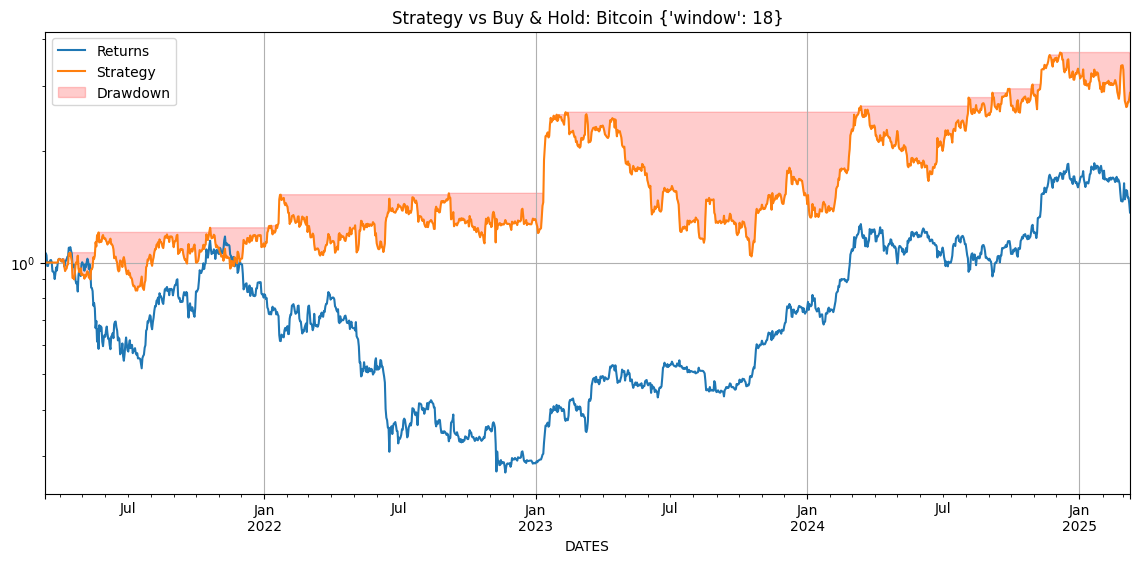

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-29 2021-04-06      Long    0.010586        1.064214       9   
1 2021-04-07 2021-04-07     Short   -0.037521       -3.682611       1   
2 2021-04-08 2021-04-17      Long    0.035232        3.586011      10   
3 2021-04-18 2021-04-29     Short   -0.043020       -4.210736      12   
4 2021-04-30 2021-05-11      Long   -0.041558       -4.070597      12   
5 2021-05-12 2021-06-02     Short    0.212880       23.723662      22   
6 2021-06-03 2021-06-03      Long   -0.009035       -0.899396       1   
7 2021-06-04 2021-06-10     Short   -0.014492       -1.438754       7   
8 2021-06-11 2021-06-11      Long   -0.009228       -0.918554       1   
9 2021-06-12 2021-06-12     Short   -0.020627       -2.041588       1   

   total_fees  
0    0.000433  
1    0.000813  
2    0.000998  
3    0.001057  
4    0.000533  
5    0.000786  
6    0.000282  
7    0.000340  
8    0.000456  
9    0.000521  


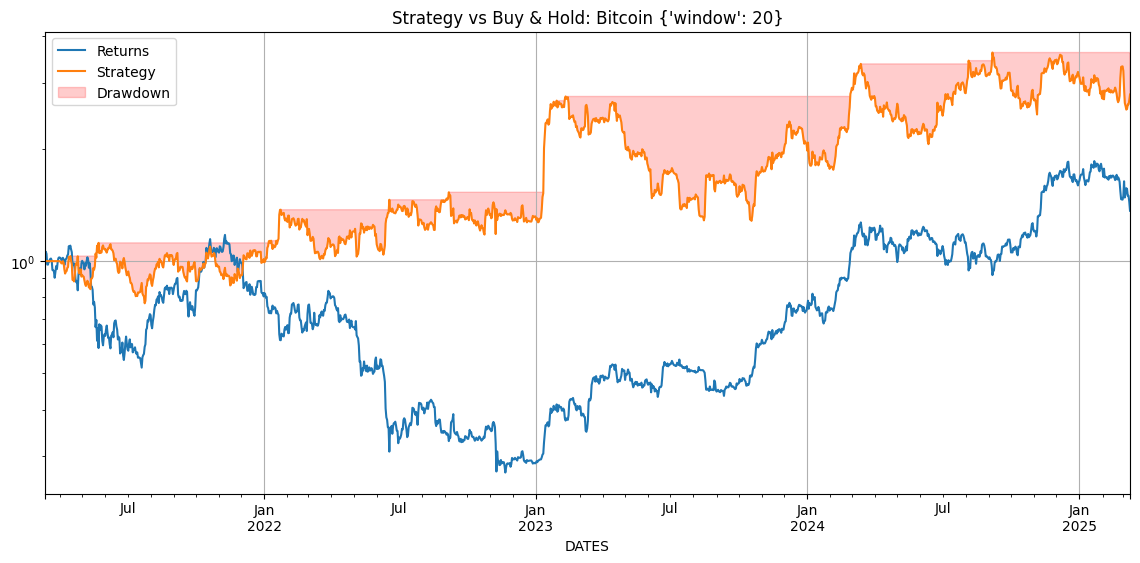

       start        end direction  log_return  net_return_pct  length  \
0 2021-03-31 2021-04-06      Long   -0.010434       -1.037969       7   
1 2021-04-07 2021-04-07     Short   -0.039198       -3.843992       1   
2 2021-04-08 2021-04-17      Long    0.030407        3.087427      10   
3 2021-04-18 2021-04-29     Short   -0.030966       -3.049116      12   
4 2021-04-30 2021-05-03      Long   -0.045589       -4.456564       4   
5 2021-05-04 2021-05-04     Short   -0.023423       -2.315123       1   
6 2021-05-05 2021-05-11      Long   -0.026112       -2.577401       7   
7 2021-05-12 2021-06-10     Short    0.216846       24.215339      30   
8 2021-06-11 2021-06-11      Long   -0.008099       -0.806601       1   
9 2021-06-12 2021-06-12     Short   -0.014377       -1.427405       1   

   total_fees  
0    0.000440  
1    0.000849  
2    0.001000  
3    0.001050  
4    0.000509  
5    0.000498  
6    0.000525  
7    0.000755  
8    0.000354  
9    0.000386  


KeyboardInterrupt: 

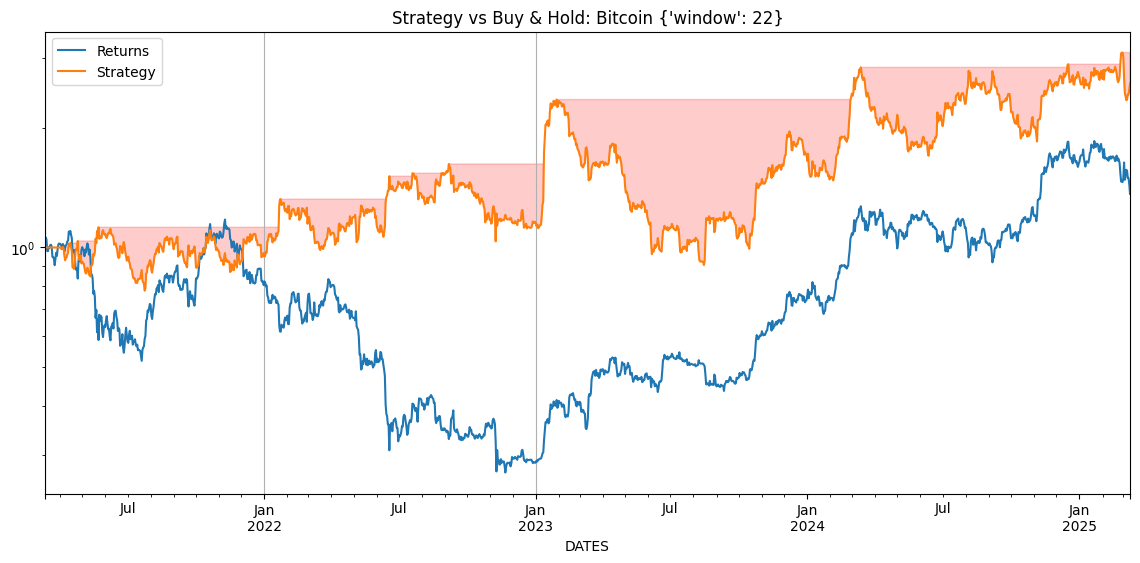

In [7]:
assets=['Bitcoin']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],long_only=False,**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)
        print(bt.extract_trades(plot_pdf=False).head(10))

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="sharpe", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)